<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/SVM_and_KNN_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.svm import SVC

size = 256

## Clone Dataset

In [2]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/This-is-splitted-for-COVID-and-NORMAL-Only.git

Cloning into 'This-is-splitted-for-COVID-and-NORMAL-Only'...
remote: Enumerating objects: 3013, done.
remote: Total 3013 (delta 0), reused 0 (delta 0), pack-reused 3013
Receiving objects: 100% (3013/3013), 1.71 GiB | 28.47 MiB/s, done.
Checking out files: 100% (3005/3005), done.


# Reading the Training images


In [3]:
#Reading Training Images For Covid and Normal
import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Covid/*.*")
cv_img = [] 
for img in path_l:
    n = cv2.imread(img)
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 


arrayl = np.asarray(cv_img) 
print(arrayl.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    n = cv2.resize(n,(size,size))
    cv_img.append(n) 
array2 = np.asarray(cv_img) 
print(array2.shape) 

(1330, 256, 256, 3)
(1072, 256, 256, 3)


# Reading the Testing images


In [4]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img)
    n = cv2.resize(n,(size,size))
    cv_img.append(n)
array3 = np.asarray(cv_img) 
print(array3.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img) 
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
array4 = np.asarray(cv_img)
print(array4.shape) 


(333, 256, 256, 3)
(269, 256, 256, 3)


# Concatenating Covid and Normal arrays into one variable for train and test:

In [6]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2))

Xtest = np.concatenate((array3,array4))

Xtrain.shape , Xtest.shape 

((2402, 256, 256, 3), (602, 256, 256, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [8]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
print('Normal labels : ',labels0 ,'Covid labels : ', labels1) 
len(labels0) , len(labels1) 


Normal labels :  [0. 0. 0. ... 0. 0. 0.] Covid labels :  [1. 1. 1. ... 1. 1. 1.]


(1330, 1072)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [9]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array3)) 
labels1s = np.ones(len(array4)) 
print('Normal labels : ',labels0s ,'Covid labels : ', labels1s) 
len(labels0s) , len(labels1s) 

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(333, 269)

# Concatenating the labels for Covid and Normal for training and testing:

In [10]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0,labels1)) 
ytest = np.concatenate((labels0s,labels1s)) 
ytrain.shape, ytest.shape 


((2402,), (602,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [11]:
# Normalizing the data from 0 to 255 to 0 to 1:
X_train_norm = Xtrain/255 
Xtest_norm = Xtest/255 


In [ ]:
X_train_norm.shape

(2402, 256, 256, 3)

# Reducing the Dimension into 2D

In [12]:
# Training data
nsamples, nx, ny, rgb = X_train_norm.shape
X_train_2d = X_train_norm.reshape((nsamples,nx*ny*rgb))
print('X_train_2d Shape: '+str(X_train_2d.shape))

#Test data
nsamples, nx, ny, rgb = Xtest_norm.shape
Xtest_2d = Xtest_norm.reshape((nsamples,nx*ny*rgb))
print('Xtest_2d Shape: '+str(Xtest_2d.shape))

X_train_2d Shape: (2402, 196608)
Xtest_2d Shape: (602, 196608)


# Visualization of Data

In [13]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

# Covid Images

covid


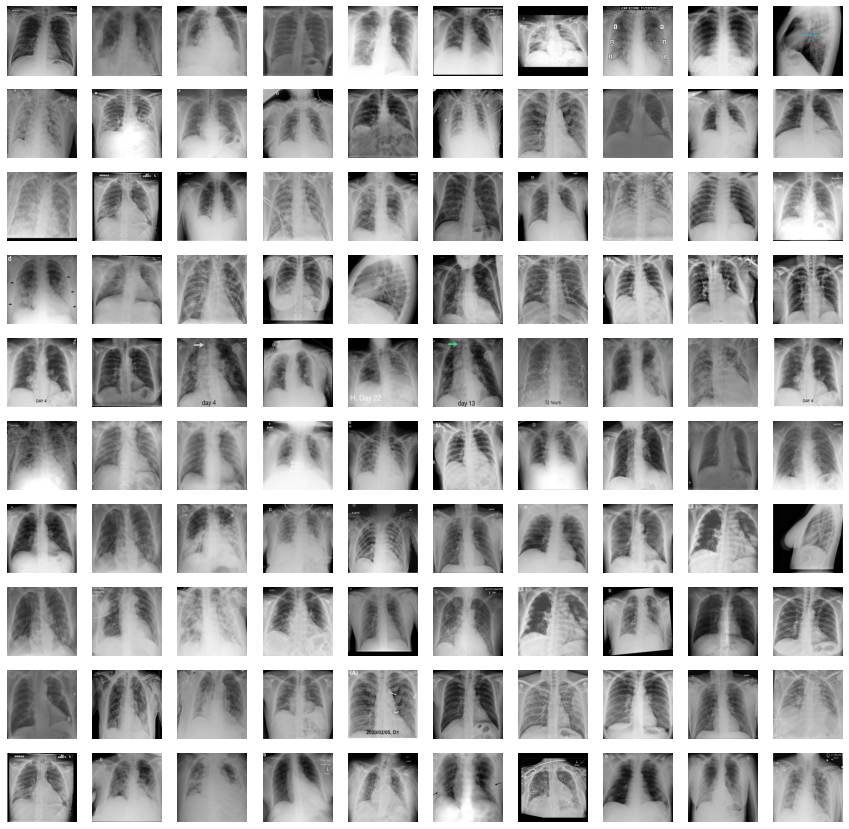

In [ ]:
print('covid')
plot_image_grid(Xtrain[0:100], 10, 10)

# healthy Images

Healthy


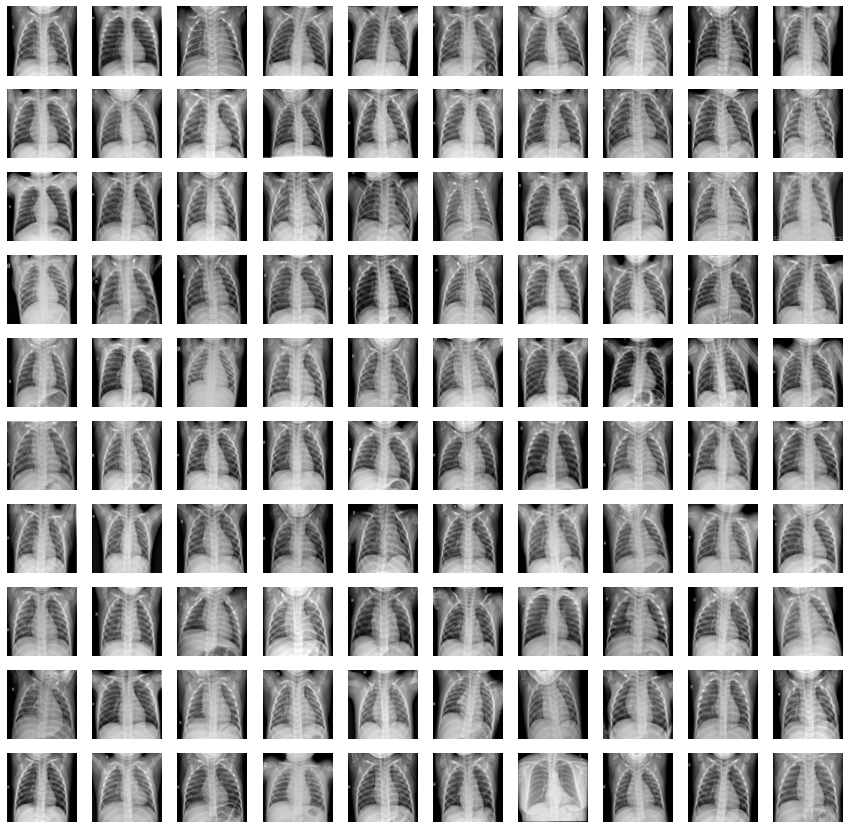

In [16]:
print('Healthy')
plot_image_grid(Xtrain[1530:1630], 10, 10)

## Building the Model

## SVM with Linear Kernel

In [ ]:
%%time
svm = SVC(gamma='auto', kernel='linear', probability=True)
history_svm = svm.fit(X_train_2d, ytrain)
print('done')

y_pred = svm.predict(Xtest_2d)



done
CPU times: user 11min 43s, sys: 1.11 s, total: 11min 44s
Wall time: 11min 45s


In [ ]:
print("Accuracy:", metrics.accuracy_score(ytest, y_pred))
print("Precision:", metrics.precision_score(ytest, y_pred))
print("Recall:", metrics.recall_score(ytest, y_pred))
print("F1 Score:", metrics.f1_score(ytest, y_pred))
print("roc_auc_score:", metrics.roc_auc_score(ytest, y_pred))


tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)


Accuracy: 0.9933554817275747
Precision: 0.9925650557620818
Recall: 0.9925650557620818
F1 Score: 0.9925650557620818
roc_auc_score: 0.9932795248780378
TN:  331
FP:  2
FN:  2
TP:  267


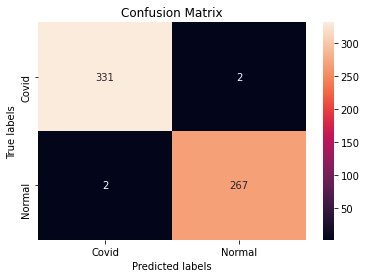

In [ ]:
import seaborn as sns

cm = metrics.confusion_matrix(ytest, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);


# ROC SVM

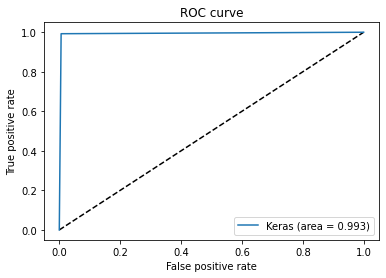

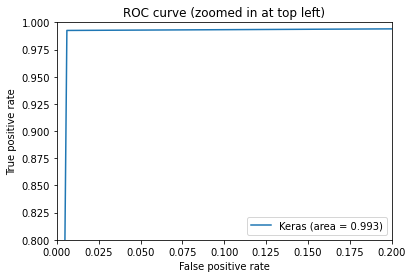

In [ ]:
# ROC
from sklearn.metrics import roc_curve
#y_pred = svm.predict(Xtest_2d).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred)

# AUC
from sklearn.metrics import auc
auc_svm = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Precision-recall curve

Logistic: f1=0.993 auc=0.994


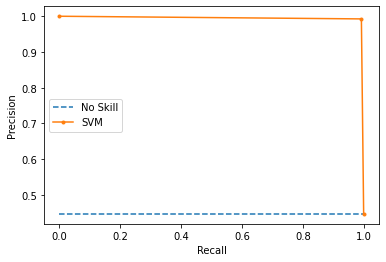

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# prob = svm.predict_proba(Xtest_2d)


lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_f1, lr_auc = f1_score(ytest, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       333
         1.0       0.99      0.99      0.99       269

    accuracy                           0.99       602
   macro avg       0.99      0.99      0.99       602
weighted avg       0.99      0.99      0.99       602

normal = 1 , covid19 = 0


## SVM with poly kernel

In [ ]:
%%time
svm = SVC(gamma='auto', kernel='poly', probability=True)
history_svm = svm.fit(X_train_2d, ytrain)
print('done')

y_pred = svm.predict(Xtest_2d)



done
CPU times: user 1h 6min 14s, sys: 5.61 s, total: 1h 6min 20s
Wall time: 1h 6min 19s


In [ ]:
print("Accuracy:", metrics.accuracy_score(ytest, y_pred))
print("Precision:", metrics.precision_score(ytest, y_pred))
print("Recall:", metrics.recall_score(ytest, y_pred))
print("F1 Score:", metrics.f1_score(ytest, y_pred))
print("roc_auc_score:", metrics.roc_auc_score(ytest, y_pred))


tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)


Accuracy: 0.9534883720930233
Precision: 0.916955017301038
Recall: 0.9851301115241635
F1 Score: 0.9498207885304658
roc_auc_score: 0.9565290197260456
TN:  309
FP:  24
FN:  4
TP:  265


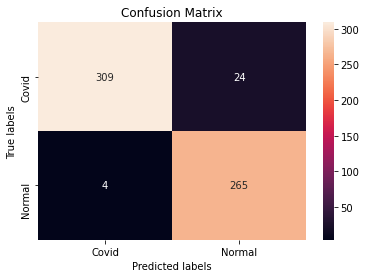

In [ ]:
import seaborn as sns

cm = metrics.confusion_matrix(ytest, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);


# ROC SVM

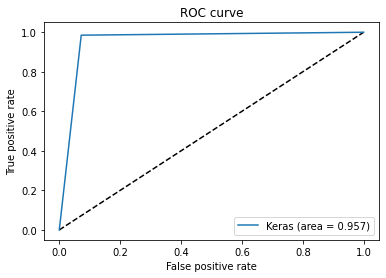

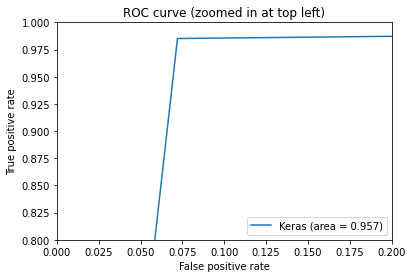

In [ ]:
# ROC
from sklearn.metrics import roc_curve
#y_pred = svm.predict(Xtest_2d).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred)

# AUC
from sklearn.metrics import auc
auc_svm = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Precision-recall curve

Logistic: f1=0.950 auc=0.954


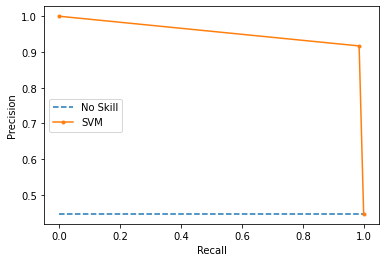

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# prob = svm.predict_proba(Xtest_2d)


lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_f1, lr_auc = f1_score(ytest, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       333
         1.0       0.92      0.99      0.95       269

    accuracy                           0.95       602
   macro avg       0.95      0.96      0.95       602
weighted avg       0.96      0.95      0.95       602

normal = 1 , covid19 = 0


## SVM with rbf kernel

In [ ]:
%%time
svm = SVC(gamma='auto', kernel='rbf', probability=True)
history_svm = svm.fit(X_train_2d, ytrain)
print('done')

y_pred = svm.predict(Xtest_2d)



done
CPU times: user 27min 37s, sys: 2.27 s, total: 27min 40s
Wall time: 27min 40s


In [ ]:
print("Accuracy:", metrics.accuracy_score(ytest, y_pred))
print("Precision:", metrics.precision_score(ytest, y_pred))
print("Recall:", metrics.recall_score(ytest, y_pred))
print("F1 Score:", metrics.f1_score(ytest, y_pred))
print("roc_auc_score:", metrics.roc_auc_score(ytest, y_pred))


tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)


Accuracy: 0.9767441860465116
Precision: 0.9602888086642599
Recall: 0.9888475836431226
F1 Score: 0.9743589743589743
roc_auc_score: 0.9779072753050446
TN:  322
FP:  11
FN:  3
TP:  266


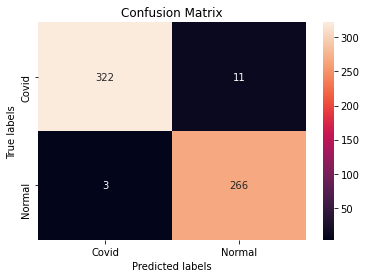

In [ ]:
import seaborn as sns

cm = metrics.confusion_matrix(ytest, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);


# ROC SVM

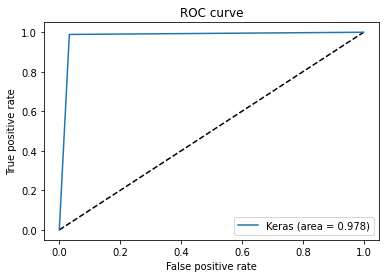

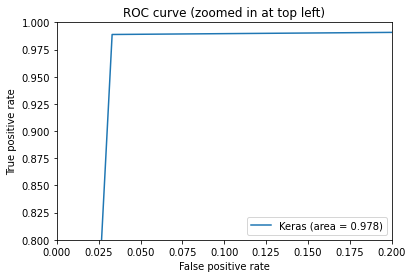

In [ ]:
# ROC
from sklearn.metrics import roc_curve
#y_pred = svm.predict(Xtest_2d).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred)

# AUC
from sklearn.metrics import auc
auc_svm = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Precision-recall curve

Logistic: f1=0.974 auc=0.977


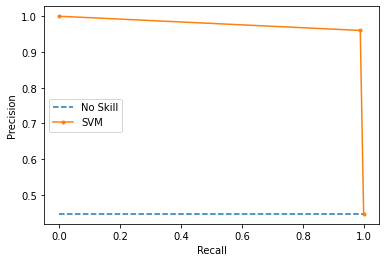

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# prob = svm.predict_proba(Xtest_2d)


lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_f1, lr_auc = f1_score(ytest, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       333
         1.0       0.96      0.99      0.97       269

    accuracy                           0.98       602
   macro avg       0.98      0.98      0.98       602
weighted avg       0.98      0.98      0.98       602

normal = 1 , covid19 = 0


# KNN

In [ ]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
print(neighbors)

[1 2 3 4 5 6 7 8]


In [ ]:
%%time
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_2d, ytrain)
    print('Done Upto KNN: ', k)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_2d, ytrain)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(Xtest_2d, ytest) 

Done Upto KNN:  1
Done Upto KNN:  2


In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
%%time
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=7)

#Fit the model
Model.fit(X_train_2d, ytrain)

In [ ]:
%%time
Model.score(Xtest_2d, ytest) # Accuracy of the model

# Result Analysis

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score


y_pred = Model.predict(Xtest_2d) # Performing predictions
confusion_matrix(ytest,y_pred) # Confusion Matrix

In [ ]:
print(classification_report(ytest,y_pred))

In [ ]:
y_pred_proba = Model.predict_proba(Xtest_2d)[:,1]

# Implementing ROC

In [ ]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_proba)

# model performance using cross-validation



In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_2d, ytrain)

In [ ]:
knn_cv.best_score_    # Best score of KNN model

In [ ]:
knn_cv.best_params_    # Best parameters for the Model